# Random Forest Classifier

In [57]:
# import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [58]:
# rename column names
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# import dataset
data = 'car_evaluation.csv'
df = pd.read_csv('car_evaluation.csv', header=None, names=col_names)

In [59]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [61]:
# frequency distribution of values in variables

for col in col_names:
    print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [62]:
# we can see that doors and persons are categorical
# there are 7 variables in the dataset, all of the categorical type
# class is the target variable

### Exploratory data analysis

In [63]:
# explore class variable

df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [64]:
# class appears to be ordinal
# not necessary to check for null since it was revealed in df.info()

### Declare feature vector and target variable

In [65]:
# declare feature vector and target variable
X = df.drop(['class'], axis=1)
y = df['class']

### Split data into training and test sets

In [66]:
# split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.33, random_state = 42)

In [67]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (571, 6))

### Feature engineering

In [68]:
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [69]:
# encode categorical variables
import category_encoders as ce

In [70]:
# using ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [71]:
# fit and transform both sets
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [72]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [73]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


### Random Forest Classifier model with default parameters

In [74]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(n_estimators=10, random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# predict the test set results
y_pred = rfc.predict(X_test)

In [75]:
# check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score with default of 10 decision-trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with default of 10 decision-trees: 0.9247


We have built the **Random Forest Classifier** with the default paramter of `n_estimators = 10`. Let's increase it.

In [76]:
# instantiate the classifier with 100 estimators
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

In [77]:
# check accuracy score
print('Model accuracy score with 100 decision trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision trees: 0.9457


### Find important features with Random Forest model

In [78]:
# create the classifier with 100 estimators
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [79]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [80]:
feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

We see that the most important feature is `safety` and the least important feature is `doors`.

### Visualize feature scores of the features

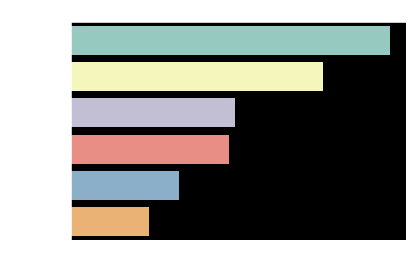

In [83]:
# creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# add title to the graph
plt.title('Visualizing Important Features')

# visualize the graph
plt.show()

### Rebuild Random Forest model on selected features

In [84]:
# declare feature vector and target variable
X = df.drop(['class', 'doors'], axis=1)
y = df['class']

In [85]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [87]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])

# fit and transform training sets
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [88]:
# instantiate the classifier with 100 estimators
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

# predict on the test set results
y_pred = clf.predict(X_test)

In [90]:
# check accuracy score
print('Model accuracy score with doors variable removed: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed: 0.9264


The accuracy of the model with all the variables taken into account is `0.9247` so we can see that the model accuracy was improved with `doors` removed for the training set. If `lug_boot`--the second least important variable--is dropped from the training set, the accuracy will be found to be `0.8546`, which is a significant drop in accuracy.

### Confusion Matrix

In [91]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


### Classification Report

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571



#### Results and conclusion

1. In this project, I build a Random Forest Classifier to predict the safety of the car. I build two models, one with 10 decision-trees and another one with 100 decision-trees.


2. The model accuracy score with 10 decision-trees is 0.9247 but the same with 100 decision-trees is 0.9457. So, as expected accuracy increases with number of decision-trees in the model.


3. I have used the Random Forest model to find only the important features, build the model using these features and see its effect on accuracy. The most important feature is safety and least important feature is doors.


4. I have removed the doors variable from the model, rebuild it and checked its accuracy. The accuracy of the model with doors variable removed is 0.9264. The accuracy of the model with all the variables taken into account is 0.9247. So, we can see that the model accuracy has been improved with doors variable removed from the model.


5. The second least important model is lug_boot. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, I will not drop it from the model.


6. Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance.